## 7-2 MNIST Introduction
    - MNIST : handwritten digits dataset
   ![title](m.png)

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
device

'cuda'

In [4]:
training_epochs = 15
batch_size = 100

### Reading data

In [5]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [6]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [7]:
# 28*28=784, 0~9:10
# softmax
linear = torch.nn.Linear(784, 10, bias=True).to(device) #layer
torch.nn.init.normal_(linear.weight) # 가우시안 초기화

Parameter containing:
tensor([[-1.2901,  0.3930, -0.1891,  ..., -0.1626, -0.3275,  0.5608],
        [-1.6757, -0.2454,  0.9221,  ...,  0.9559,  0.6160, -0.4226],
        [ 0.2444,  1.4810, -2.0906,  ...,  0.1206,  1.0044, -0.3737],
        ...,
        [ 0.6234,  1.8019, -2.7563,  ..., -0.5889, -0.5576,  0.7360],
        [-0.2871, -1.3313, -2.2248,  ...,  0.0309,  0.9180, -0.1482],
        [ 0.7678,  0.6624, -0.5362,  ...,  0.2338,  0.3688, -0.7182]],
       device='cuda:0', requires_grad=True)

In [8]:
criterion = torch.nn.CrossEntropyLoss().to(device)  
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

### training 

In [9]:
from tqdm import tqdm_notebook as tqdm

In [10]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in tqdm(data_loader):
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')


Epoch: 0001 cost = 2.745348454



Epoch: 0002 cost = 1.059187531



Epoch: 0003 cost = 0.844054937



Epoch: 0004 cost = 0.739262044



Epoch: 0005 cost = 0.673619568



Epoch: 0006 cost = 0.626395404



Epoch: 0007 cost = 0.591207325



Epoch: 0008 cost = 0.562674522



Epoch: 0009 cost = 0.539698124



Epoch: 0010 cost = 0.519908965



Epoch: 0011 cost = 0.502898872



Epoch: 0012 cost = 0.489053577



Epoch: 0013 cost = 0.476038426



Epoch: 0014 cost = 0.464439780



Epoch: 0015 cost = 0.454218805
Learning finished


### test

In [11]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

C:\Users\Moon\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\Moon\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.8664999604225159


In [13]:
prediction.shape

torch.Size([10000, 10])

### visualization

Label:  8
Prediction:  1


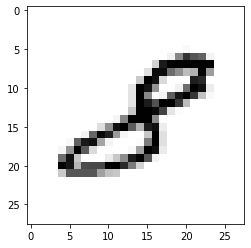

In [12]:
# Get one and predict
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = linear(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
plt.show()